In [ ]:
!pip install azure-cognitiveservices-vision-computervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
!pip install pillow

In [ ]:
!pip install jellyfish

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.2 MB/s eta 0:00:00


In [ ]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=e84e19fb03f37266a98eb802eec4436f2eb5d6dc561903c8833a4251f2d142db
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
!pip install matplotlib

In [ ]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image, ImageFilter, ImageDraw, ImageEnhance
import sys
import time
import editdistance
import jellyfish
import distance
import matplotlib.pyplot as plt

In [ ]:
%env VISION_KEY=dc87d8aa49094e3ca8a2b68f5fc06b8e

env: VISION_KEY=dc87d8aa49094e3ca8a2b68f5fc06b8e


In [ ]:
%env VISION_ENDPOINT=https://raulfrandes.cognitiveservices.azure.com/

env: VISION_ENDPOINT=https://raulfrandes.cognitiveservices.azure.com/


In [ ]:
'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

In [ ]:
!wget https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab03/test1.png

--2024-03-29 10:45:37--  https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab03/test1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61840 (60K) [image/png]
Saving to: ‘test1.png’

test1.png           100%[===================>]  60.39K  --.-KB/s    in 0.002s  

2024-03-29 10:45:37 (30.0 MB/s) - ‘test1.png’ saved [61840/61840]



In [ ]:
!wget https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab03/test2.jpeg

--2024-03-29 10:45:37--  https://raw.githubusercontent.com/lauradiosan/AI-UBB/main/2023-2024/labs/lab03/test2.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 136964 (134K) [image/jpeg]
Saving to: ‘test2.jpeg’

test2.jpeg          100%[===================>] 133.75K  --.-KB/s    in 0.003s  

2024-03-29 10:45:37 (38.3 MB/s) - ‘test2.jpeg’ saved [136964/136964]



Lucces in resolvarea
TEMELOR la
LABORA toarele de
Inteligenta Artificialà!



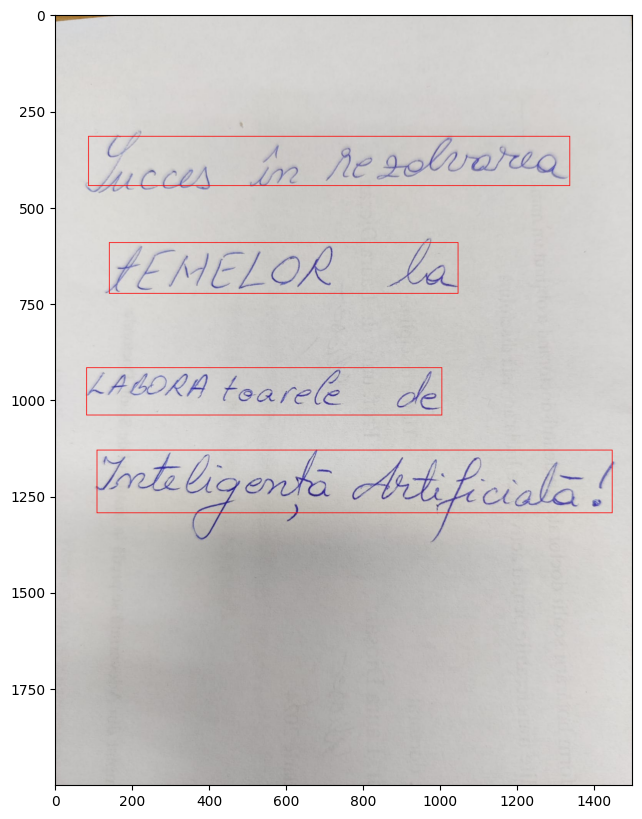

In [ ]:
#img = open("test1.png", "rb")
img = open("/content/test2.jpeg", "rb")
read_response = computervision_client.read_in_stream(
    image=img,
    mode="Handwritten",
    raw=True
)
# print(read_response.as_dict())

operation_id = read_response.headers['Operation-Location'].split('/')[-1]
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
result = []
pred_bounding_boxes = {}
image_recon = Image.open("/content/test2.jpeg")
draw = ImageDraw.Draw(image_recon)
i = 1
if read_result.status == OperationStatusCodes.succeeded:
  for text_result in read_result.analyze_result.read_results:
    for line in text_result.lines:
      print(line.text)
      result.append(line.text)

      bounding_box = line.bounding_box
      top_left = (bounding_box[0], bounding_box[1])
      bottom_right = (bounding_box[4], bounding_box[5])
      pred_bounding_boxes['line' + str(i)] = [top_left, bottom_right]
      draw.rectangle([top_left, bottom_right], outline="red", width=2)
      i += 1

print()

image_recon.save("text2_with_boxes.jpg")
plt.figure(figsize=(10, 10))
plt.imshow(image_recon)
plt.show()

In [ ]:
# get/define the ground truth
# groundTruth = ["Google Cloud", "Platform"]
groundTruth = ["Succes in rezolvarea", "tEMELOR la", "LABORAtoaree de", "Inteligenta Artificiala!"]

# compute the performance
noOfCorrectLines = sum(i == j for i, j in zip(result, groundTruth))
print(noOfCorrectLines)

0


1. Sa se determine calitatea procesului de recunoastere a textului, atat la nivel de caracter, cat si la nivel de cuvant
  - a. prin folosirea unei metrici de distanta

In [ ]:
# Levenshtein Distance
correct_text = " ".join(groundTruth)
recognized_text = " ".join(result)

cer_distance = editdistance.eval(correct_text, recognized_text)

correct_words = correct_text.split()
recognized_words = recognized_text.split()

wer_distance = editdistance.eval(correct_words, recognized_words)

cer = cer_distance / len(correct_text)
wer = wer_distance / len(correct_words)

print(cer)
print(wer)

0.08333333333333333
0.6666666666666666


- b. prin folosirea mai multor metrici de distanta.

In [ ]:
# Jaro-Winkler Distance
cer_distance = 1 - jellyfish.jaro_similarity(correct_text, recognized_text)

total_distance_words = 0
for correct_word in correct_words:
    for recognized_word in recognized_words:
        total_distance_words += 1 - jellyfish.jaro_similarity(correct_word, recognized_word)
wer_distance = total_distance_words / (len(correct_words) * len(recognized_words))

cer = cer_distance / len(correct_text)
wer = wer_distance / len(correct_words)

print(cer)
print(wer)

0.002266563949570485
0.07629157536564943


In [ ]:
# Hamming Distance
min_length = min(len(correct_text), len(recognized_text))
correct_text = correct_text[:min_length]
recognized_text = recognized_text[:min_length]
cer_distance = distance.hamming(correct_text, recognized_text)

total_distance_words = 0
for i in range(min(len(correct_words), len(recognized_words))):
    min_length = min(len(correct_words[i]), len(recognized_text[i]))
    correct_words[i] = correct_words[i][:min_length]
    recognized_words[i] = recognized_words[i][:min_length]
    total_distance_words += distance.hamming(correct_words[i], recognized_words[i])
wer_distance = total_distance_words / max(len(correct_words), len(recognized_words))

cer = cer_distance / len(correct_text)
wer = wer_distance / len(correct_words)

print(cer)
print(wer)

0.4583333333333333
0.05555555555555555


2. Calitatea localizarii corecte a textului in imagine

The IoU score is:  0.8226029073392853



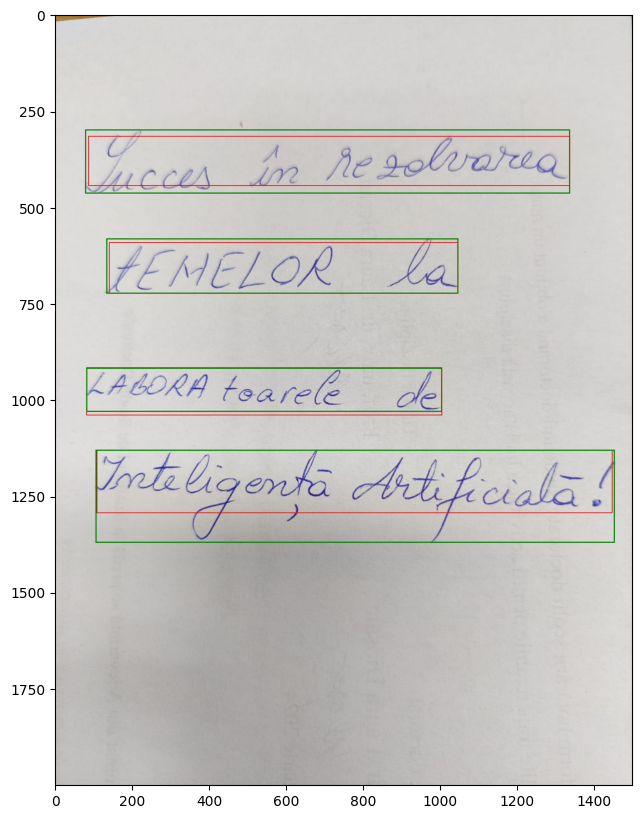

In [ ]:
def calculate_iou(box_a, box_b):
  x_left = max(box_a[0][0], box_b[0][0])
  y_top = max(box_a[0][1], box_b[0][1])
  x_right = min(box_a[1][0], box_b[1][0])
  y_bottom = min(box_a[1][1], box_b[1][1])

  if x_right < x_left or y_bottom < y_top:
    return 0.0

  intersection_area = (x_right - x_left) * (y_bottom - y_top)

  box_a_area = (box_a[1][0] - box_a[0][0]) * (box_a[1][1] - box_a[0][1])
  box_b_area = (box_b[1][0] - box_b[0][0]) * (box_b[1][1] - box_b[0][1])

  union_area = box_a_area + box_b_area - intersection_area

  return intersection_area / union_area


ground_truth_bounding_boxes = {
    'line1': [(78.0, 297.0), (1336.0, 463.0)],
    'line2': [(133.0, 580.0), (1046.0, 723.0)],
    'line3': [(81.0, 916.0), (1004.0, 1030.0)],
    'line4': [(105.0, 1129.0), (1452.0, 1370.0)]
}

image_manual_recon = Image.open('/content/text2_with_boxes.jpg')
draw_manual = ImageDraw.Draw(image_manual_recon)

for line in ground_truth_bounding_boxes:
  draw_manual.rectangle(ground_truth_bounding_boxes[line], outline="green", width=3)

image_manual_recon.save('text2_with_boxes.jpg')

ious = {}
for line in ground_truth_bounding_boxes:
  ious[line] = calculate_iou(pred_bounding_boxes[line], ground_truth_bounding_boxes[line])

iou = sum(ious.values()) / len(ious)
print("The IoU score is: ", iou)
print()

plt.figure(figsize=(10, 10))
plt.imshow(image_manual_recon)
plt.show()

3. Posibilitati de imbunatatire a recunoasterii textului

The IoU score of the original image is:  0.8226029073392853
The IoU score of the processed image is:  0.8236183273633023



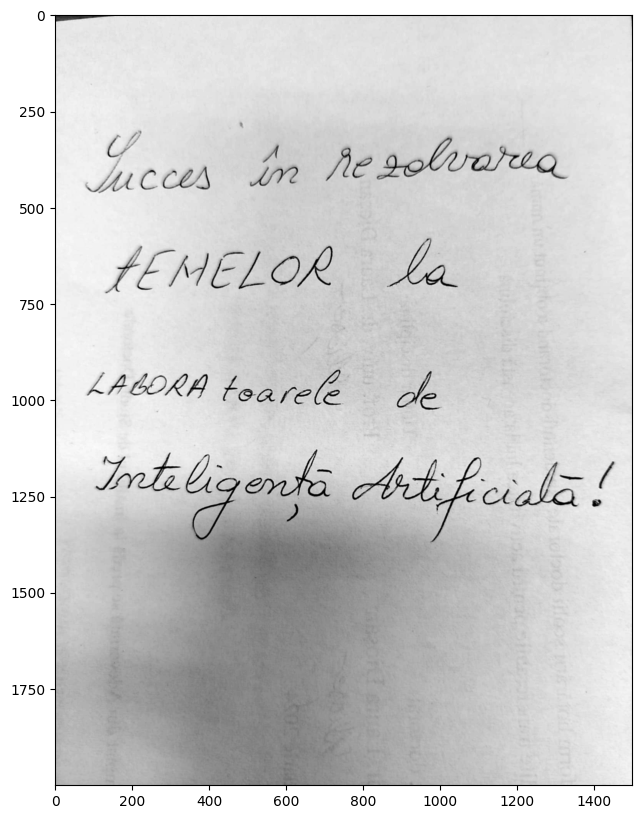

In [ ]:
# Image Pre-processing
original_image = Image.open('/content/test2.jpeg')

gray_image = original_image.convert('L')

enhancer = ImageEnhance.Contrast(gray_image)
contrast_image = enhancer.enhance(2)

blurred_image = contrast_image.filter(ImageFilter.GaussianBlur(radius=1))
sharpened_image = blurred_image.filter(ImageFilter.UnsharpMask(radius=1, percent=150, threshold=3))

sharpened_image.save('processed-test2.jpeg')

img = open("/content/processed-test2.jpeg", "rb")
read_response = computervision_client.read_in_stream(
    image=img,
    mode="Handwritten",
    raw=True
)

operation_id = read_response.headers['Operation-Location'].split('/')[-1]
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

processed_bounding_boxes = {}
i = 1
if read_result.status == OperationStatusCodes.succeeded:
  for text_result in read_result.analyze_result.read_results:
    for line in text_result.lines:
      bounding_box = line.bounding_box
      top_left = (bounding_box[0], bounding_box[1])
      bottom_right = (bounding_box[4], bounding_box[5])
      processed_bounding_boxes['line' + str(i)] = [top_left, bottom_right]
      i += 1

ious_processed = {}
for line in ground_truth_bounding_boxes:
  ious_processed[line] = calculate_iou(processed_bounding_boxes[line], ground_truth_bounding_boxes[line])

iou_processed = sum(ious_processed.values()) / len(ious_processed)
print("The IoU score of the original image is: ", iou)
print("The IoU score of the processed image is: ", iou_processed)

print()

plt.figure(figsize=(10, 10))
plt.imshow(sharpened_image, cmap='gray')
plt.show()